In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import NoNorm

In [4]:
base = """
5 2 6 2 3 2 1 2 3 1
1 3 6 7 9 2 4 4 7 1
1 5 8 8 10 17 21 19 9 4
4 18 34 56 17 25 38 17 7 2
1 14 22 43 68 91 62 23 16 7
6 12 21 21 39 87 76 34 4 2
9 24 54 73 88 95 69 16 12 5
3 5 6 40 34 42 6 4 2 5
4 9 16 14 32 51 13 6 6 2
4 2 5 3 3 3 5 3 3 3
"""

S_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])*0.25
S_y = S_x.T
S_fs = np.array([[0, -1, 2], [-1, 0, 1], [2, 1, 0]])*0.25


In [5]:
base = np.array([[int(number) for number in line.split(" ")] for line in base.split("\n") if line != ""])

# Eingelesenes Bild

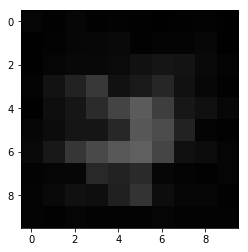

In [6]:
plt.imshow(base, cmap="gray", norm=NoNorm())

# Faltungsoperator

In [7]:
def convolve(image, kernel):
    kernel_size = kernel.shape[0]
    _image = np.pad(image, ((kernel_size//2, kernel_size//2), (kernel_size//2, kernel_size//2)), 'constant') # padd with zeros
    output_image = np.copy(image)
    for (x, y), value in np.ndenumerate(image):
        window = _image[x:x+kernel_size, y:y+kernel_size] # image[x-1:x+2, y-1:y+2] but x=x+1, y=y+1 because of pad
        output_image[x, y] = np.sum(np.multiply(window, kernel))
    return output_image

# 1) Mittelwertfilter

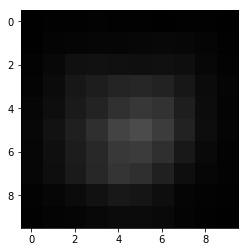

In [8]:
average_kernel = np.zeros((3,3)) + 1/9
avg = convolve(base, average_kernel)//1
plt.imshow(avg, cmap="gray", norm=NoNorm())


# 2) Sobel-Operator mit Grauwertspeizung (Quelle: http://home.in.tum.de/~perzylo/Proseminar/Punktoperatoren.pdf)

In [9]:
def scale(image, g_1, g_2, G=255):
    output = np.copy(image)
    for (x, y), value in np.ndenumerate(image):
        if value < g_1:
            output[x, y] = 0
        elif value > g_2:
            output[x, y] = G - 1
        else:
            output[x, y] = (G - 1)*(value - g_1)/(g_2 - g_1)
    return output


# Eingabebild mit Grauwertspreizung

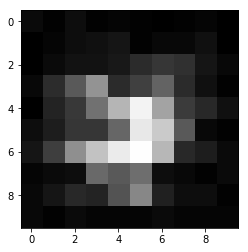

In [10]:
scaled = scale(base, np.min(base), np.max(base))
plt.imshow(scaled, cmap="gray", norm=NoNorm())

# Kanten in x-Richtung

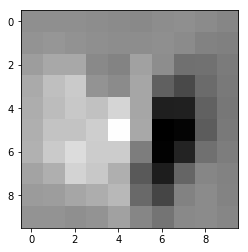

In [11]:
x = convolve(base, S_x)
plt.imshow(scale(x, np.min(x), np.max(x)), cmap="gray", norm=NoNorm())

# Kanten in y-Richtung

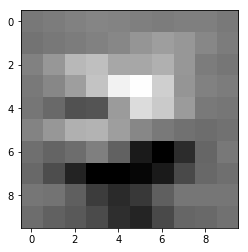

In [12]:
y = convolve(base, S_y)
plt.imshow(scale(y, np.min(y), np.max(y)), cmap="gray", norm=NoNorm())

# Ermittelte Kanten

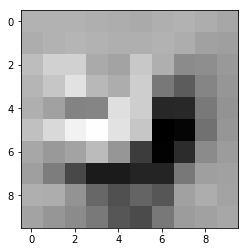

In [15]:
g = np.minimum(x, y)
plt.imshow(scale(g, np.min(g), np.max(g)), cmap="gray", norm=NoNorm())

In [20]:
#import cv2
#base = cv2.imread("input.ppm", 0)
#plt.imshow(base, cmap="gray", norm=NoNorm())